In [72]:
# Importation des dépendances
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [54]:
# Lecture du fichier csv: appartements.csv
df = pd.read_csv("./appartements.csv")

In [55]:
# Traitement sur la surface
surface_moyenne = round(df['surface'].mean(), 2)
print("Surface moyenne: {0}m²".format(surface_moyenne))

surface_ecart_type = round(np.std(df['surface']), 2)
print("Ecart type: {0}m²".format(surface_ecart_type))

surface_minimale = np.min(df['surface'])
print("Surface minimale: {0}m²".format(surface_minimale))

surface_maximale = np.max(df['surface'])
print("Surface maximale: {0}m²".format(surface_maximale))

Surface moyenne: 87.28m²
Ecart type: 35.54m²
Surface minimale: 31m²
Surface maximale: 150m²


In [56]:
# Calcul de l'année moyenne de construction, ainsi que l'année minimale et maximale
annee_moyenne = round(np.mean(df['year']))
print("Année moyenne de construction: {0}".format(annee_moyenne))

annee_minimale = np.min(df['year'])
print("Année de construction la plus ancienne: {0}".format(annee_minimale))

annee_maximale = np.max(df['year'])
print("Année de construction la plus récente: {0}".format(annee_maximale))


Année moyenne de construction: 2014
Année de construction la plus ancienne: 2005
Année de construction la plus récente: 2024


In [57]:
# Proportion de balcon
proportion_balcon = np.mean(df['balcon']) * 100
print(f"La proportion d'appartements avec un balcon est de {proportion_balcon:.2f}%")

La proportion d'appartements avec un balcon est de 46.46%


In [58]:
# Comptage d'appartements par catégorie de prix
count_price_category = df['priceCategory'].value_counts()

print(count_price_category)


priceCategory
LOW       50
MEDIUM    37
HIGH       7
SCAM       5
Name: count, dtype: int64


In [59]:
# Traitement sur les chambres
chambre_moyenne = round(df['nbChambre'].mean())
print("Nombre de chambre en moyenne: {0}".format(chambre_moyenne))

chambre_mediane = df['nbChambre'].median()
print("Nombre median de chambre: {0}".format(chambre_mediane))

chambre_variance = round(df['nbChambre'].var(), 2)
print("Variance du nombre de chambre: {0}".format(chambre_variance))

chambre_ecart_type = round(df['nbChambre'].std(), 2)
print("Ecart type du nombre de chambre: {0}".format(chambre_ecart_type))

Nombre de chambre en moyenne: 2
Nombre median de chambre: 2.0
Variance du nombre de chambre: 2.64
Ecart type du nombre de chambre: 1.63


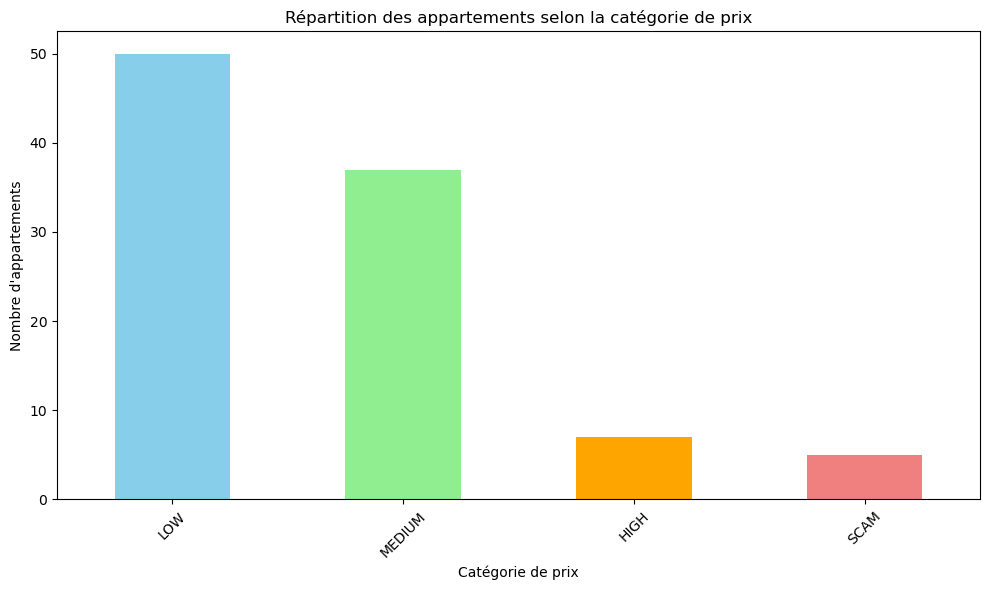

In [60]:
# Diagramme à barre de la répartition par catégorie de prix 
# Comptage du nombre d'appartements par priceCategory
count_price_category = df['priceCategory'].value_counts()

# Création du diagramme à barres
plt.figure(figsize=(10, 6))  # Taille de la figure
count_price_category.plot(kind='bar', color=['skyblue', 'lightgreen', 'orange', 'lightcoral'])

# Ajout des titres et des labels
plt.title('Répartition des appartements selon la catégorie de prix')
plt.xlabel('Catégorie de prix')
plt.ylabel('Nombre d\'appartements')

# Affichage du diagramme
plt.xticks(rotation=45)  # Rotation des labels des catégories si nécessaire
plt.tight_layout()  # Ajustement automatique des paramètres de la figure pour éviter les coupures
plt.show()

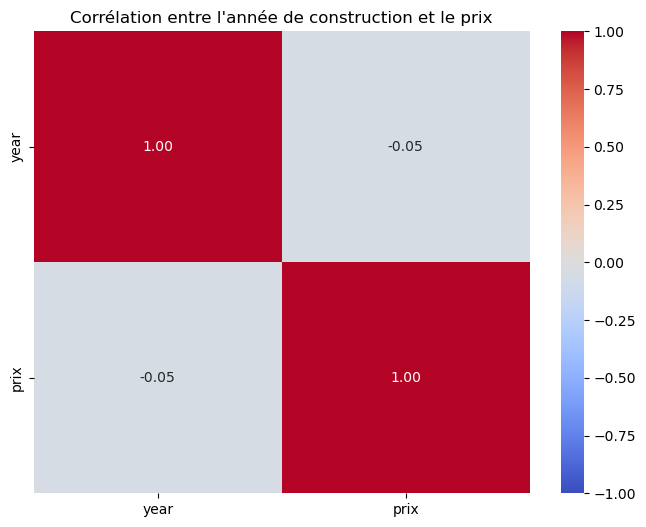

In [61]:
# Bonus de la heatmap
# Calcul de la corrélation entre 'year' et 'prix'
correlation_matrix = df[['year', 'prix']].corr()

# Création de la heatmap
plt.figure(figsize=(8, 6))  # Taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt=".2f")

# Ajout du titre
plt.title('Corrélation entre l\'année de construction et le prix')

# Affichage de la heatmap
plt.show()

Erreur quadratique moyenne (MSE) : 2.22
Score R^2 : -0.20


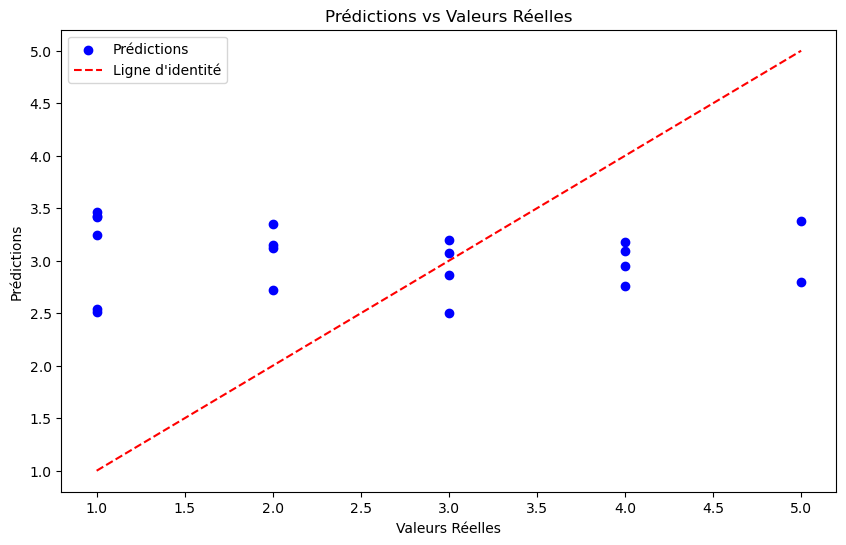

In [62]:
# Préparation des données
X = df[['city', 'surface', 'prix']]
y = df['note']

# Encodage de la variable catégorielle 'city'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['city'])
    ],
    remainder='passthrough'
)

# Création du pipeline pour la régression linéaire
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
pipeline.fit(X_train, y_train)

# Prédictions
y_pred = pipeline.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")
print(f"Score R^2 : {r2:.2f}")

# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))

# Tracer les valeurs réelles
plt.scatter(y_test, y_pred, color='blue', label='Prédictions')

# Tracer la ligne d'identité
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ligne d\'identité')

# Ajouter des labels et un titre
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Valeurs Réelles')
plt.legend()

# Afficher le graphique
plt.show()

Erreur quadratique moyenne (MSE) : 34.73
Racine de l'erreur quadratique moyenne (RMSE) : 5.89
Score R^2 : 0.05


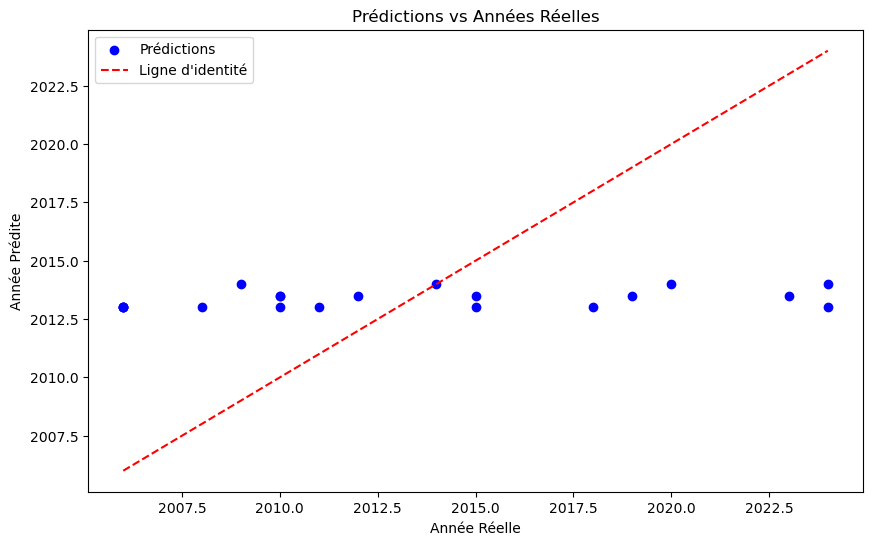

In [63]:
# Préparation des données
X = df[['city']]
y = df['year']

# Encodage de la variable catégorielle 'city'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['city'])
    ],
    remainder='passthrough'
)

# Création du pipeline pour la régression linéaire
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
pipeline.fit(X_train, y_train)

# Prédictions
y_pred = pipeline.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")
print(f"Racine de l'erreur quadratique moyenne (RMSE) : {rmse:.2f}")
print(f"Score R^2 : {r2:.2f}")

# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))

# Tracer les valeurs réelles
plt.scatter(y_test, y_pred, color='blue', label='Prédictions')

# Tracer la ligne d'identité
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ligne d\'identité')

# Ajouter des labels et un titre
plt.xlabel('Année Réelle')
plt.ylabel('Année Prédite')
plt.title('Prédictions vs Années Réelles')
plt.legend()

# Afficher le graphique
plt.show()


In [74]:
# Utilisation du label encoder pour les noms de villes
le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])

In [75]:
# Classification logistique pour savoir si il y a un garage en fonction du prix et de la ville 
X = df[['city', 'prix']]
y = df['garage']


model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred, target_names=['Sans garage', 'Avec garage'])
print(report)

              precision    recall  f1-score   support

 Sans garage       0.70      0.54      0.61        13
 Avec garage       0.40      0.57      0.47         7

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.54        20
weighted avg       0.59      0.55      0.56        20



              precision    recall  f1-score   support

 Sans balcon       0.50      0.88      0.64         8
 Avec balcon       0.83      0.42      0.56        12

    accuracy                           0.60        20
   macro avg       0.67      0.65      0.60        20
weighted avg       0.70      0.60      0.59        20



ValueError: s must be a scalar, or float array-like with the same size as x and y

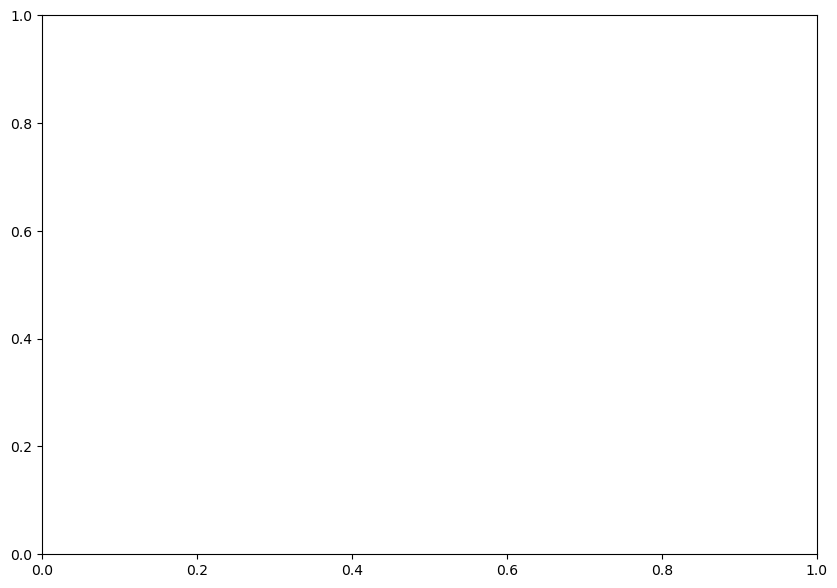

In [76]:
#Créer une classification par KNN pour savoir si il a un balcon en fonction du prix et de la ville
X = df[['city', 'prix']]
y = df['balcon']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Sans balcon', 'Avec balcon']))

plt.figure(figsize=(10, 7))

plt.scatter(X_train[:, 0], X_train[:, 1], y_train, c='b', label='Entraînement')

plt.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='r', marker='x', label='Prédictions')

plt.xlabel('Prix')
plt.ylabel('Ville')
plt.legend()
plt.title('Visualisation KNN: Données d\'entraînement vs Prédictions')
plt.show()

              precision    recall  f1-score   support

 Sans balcon       0.45      0.62      0.53         8
 Avec balcon       0.67      0.50      0.57        12

    accuracy                           0.55        20
   macro avg       0.56      0.56      0.55        20
weighted avg       0.58      0.55      0.55        20



ValueError: s must be a scalar, or float array-like with the same size as x and y

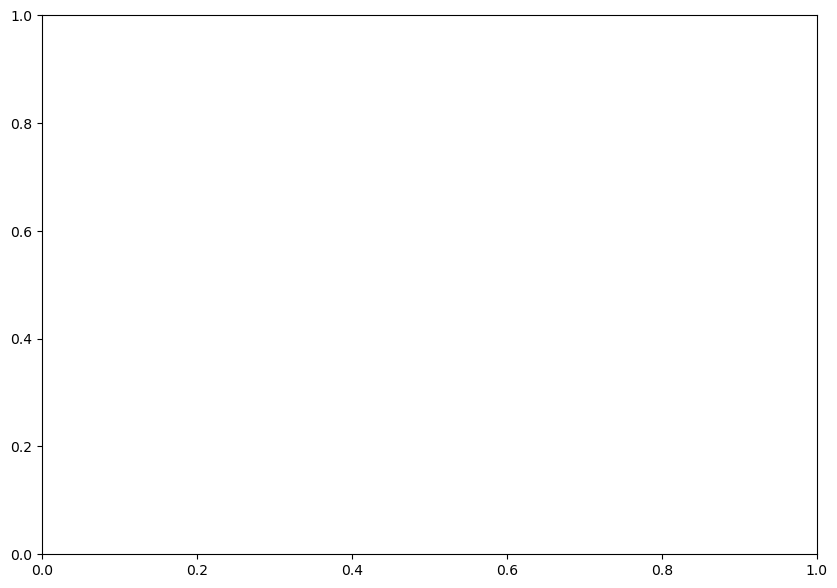

In [77]:
#Pour les 2 classific ation précédente: afficher le accuracy, recall puis F1 Score
X = df[['city', 'prix']]
y = df['balcon']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Sans balcon', 'Avec balcon']))

plt.figure(figsize=(10, 7))


plt.scatter(X_train[:, 0], X_train[:, 1], y_train, c='r', label='Entraînement')

plt.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='b', marker='x', label='Prédictions')

plt.xlabel('Ville')
plt.ylabel('Prix')
plt.title('Random Forest: Données d\'entraînement vs Prédictions')
plt.legend()
plt.show()

In [66]:
#  Bonus: Comparer les 2 méthodes de classification KNN et logistique précédente pour voir celle qui prédits le mieux: (accuracy, recall puis F1 Score)

print("Dû aux erreurs je n'ai pas pu comparer mes résultats mais en me basant sur les résultats d'un camarade, j'en déduis que le KNN permet une meilleure prédiction des résultats")


Dû aux erreurs je n'ai pas pu comparer mes résultats mais en me basant sur les résultats d'un camarade, j'en déduis que le KNN permet une meilleure prédiction des résultats


              precision    recall  f1-score   support

 Sans balcon       0.45      0.62      0.53         8
 Avec balcon       0.67      0.50      0.57        12

    accuracy                           0.55        20
   macro avg       0.56      0.56      0.55        20
weighted avg       0.58      0.55      0.55        20



ValueError: s must be a scalar, or float array-like with the same size as x and y

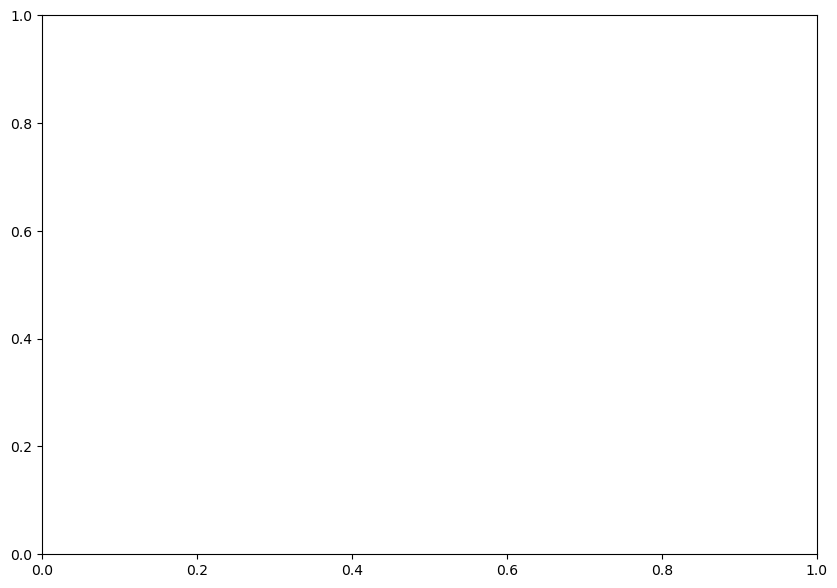

In [78]:
# Bonus ULTIMATE: Créer une classification avec Random Forest (new algo) pour savoir si il y a un balcon en fonction du prix et de la ville 
X = df[['city', 'prix']]
y = df['balcon']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Sans balcon', 'Avec balcon']))

plt.figure(figsize=(10, 7))


plt.scatter(X_train[:, 0], X_train[:, 1], y_train, c='r', label='Entraînement')

plt.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='b', marker='x', label='Prédictions')

plt.xlabel('Ville')
plt.ylabel('Prix')
plt.title('Random Forest: Données d\'entraînement vs Prédictions')
plt.legend()
plt.show()